___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', 60)

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv("treetypes10k.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,3183,72,12,85,9,2640,234,215,111,1647,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2799,24,16,120,17,1084,210,205,128,3129,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3220,120,14,150,-15,2466,243,228,111,3887,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3014,79,17,120,3,3292,240,207,91,808,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,3169,73,9,424,53,1988,230,223,126,3037,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9750 entries, 0 to 9749
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           9750 non-null   int64
 1   Aspect                              9750 non-null   int64
 2   Slope                               9750 non-null   int64
 3   Horizontal_Distance_To_Hydrology    9750 non-null   int64
 4   Vertical_Distance_To_Hydrology      9750 non-null   int64
 5   Horizontal_Distance_To_Roadways     9750 non-null   int64
 6   Hillshade_9am                       9750 non-null   int64
 7   Hillshade_Noon                      9750 non-null   int64
 8   Hillshade_3pm                       9750 non-null   int64
 9   Horizontal_Distance_To_Fire_Points  9750 non-null   int64
 10  Wilderness_Area_1                   9750 non-null   int64
 11  Wilderness_Area_2                   9750 non-null   int64
 12  Wilder

In [4]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.0,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000,9750.0,9750.000000,9750.000000,9750.000000,9750.000000,9750.000000
mean,2775.373538,157.472923,16.028000,233.513641,50.686256,1789.926462,211.959179,219.255897,136.043692,1569.092205,0.259487,0.035077,0.422359,0.281436,0.016615,0.031487,0.051487,0.043692,0.008205,0.033128,0.000205,0.000103,0.000615,0.118154,0.020615,0.020923,0.032205,0.004923,0.0,0.005538,0.026974,0.002667,0.003385,0.009128,0.001026,0.028103,0.053846,0.020513,0.000103,0.004410,0.001333,0.000923,0.095077,0.045949,0.023590,0.047487,0.045949,0.001949,0.005538,0.0,0.002462,0.043692,0.036513,0.027897,3.743590
std,410.105585,110.556666,8.208218,211.563377,61.375971,1358.877537,30.619497,22.089674,45.127357,1151.255250,0.438376,0.183984,0.493960,0.449723,0.127832,0.174639,0.221001,0.204420,0.090214,0.178980,0.014322,0.010127,0.024801,0.322807,0.142100,0.143134,0.176554,0.069995,0.0,0.074218,0.162017,0.051574,0.058082,0.095109,0.032011,0.165274,0.225725,0.141754,0.010127,0.066267,0.036492,0.030370,0.293336,0.209385,0.151775,0.212689,0.209385,0.044104,0.074218,0.0,0.049555,0.204420,0.187572,0.164687,2.047216
min,1876.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,103.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2411.000000,65.000000,10.000000,67.000000,5.000000,797.000000,195.000000,207.000000,109.000000,752.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2801.000000,126.000000,15.000000,185.500000,32.000000,1377.000000,219.000000,223.000000,139.000000,1302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3125.000000,264.000

In [5]:
for i in df.columns:
    print("Unique values of", i, "column :  ", df[i].nunique())

Unique values of Elevation column :   1594
Unique values of Aspect column :   360
Unique values of Slope column :   51
Unique values of Horizontal_Distance_To_Hydrology column :   889
Unique values of Vertical_Distance_To_Hydrology column :   397
Unique values of Horizontal_Distance_To_Roadways column :   3825
Unique values of Hillshade_9am column :   172
Unique values of Hillshade_Noon column :   132
Unique values of Hillshade_3pm column :   246
Unique values of Horizontal_Distance_To_Fire_Points column :   3332
Unique values of Wilderness_Area_1 column :   2
Unique values of Wilderness_Area_2 column :   2
Unique values of Wilderness_Area_3 column :   2
Unique values of Wilderness_Area_4 column :   2
Unique values of Soil_Type_1 column :   2
Unique values of Soil_Type_2 column :   2
Unique values of Soil_Type_3 column :   2
Unique values of Soil_Type_4 column :   2
Unique values of Soil_Type_5 column :   2
Unique values of Soil_Type_6 column :   2
Unique values of Soil_Type_7 column :

In [6]:
df.Cover_Type.value_counts()

1    1750
2    1750
3    1250
4    1250
5    1250
6    1250
7    1250
Name: Cover_Type, dtype: int64

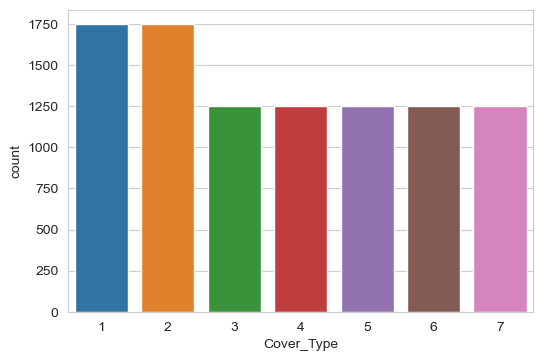

In [7]:
sns.countplot(df.Cover_Type);

In [8]:
Soil_Type_Fields = ['Soil_Type_'+ str(i) for i in range(1,41)]
train_Soil_Type = df[Soil_Type_Fields]
train_Soil_Type['Soil_Type_'] = train_Soil_Type.idxmax(axis = 1)
train_Soil_Type['Soil_Type_']

0       Soil_Type_31
1       Soil_Type_24
2       Soil_Type_23
3       Soil_Type_33
4       Soil_Type_24
            ...     
9745    Soil_Type_30
9746    Soil_Type_32
9747    Soil_Type_32
9748    Soil_Type_40
9749    Soil_Type_24
Name: Soil_Type_, Length: 9750, dtype: object

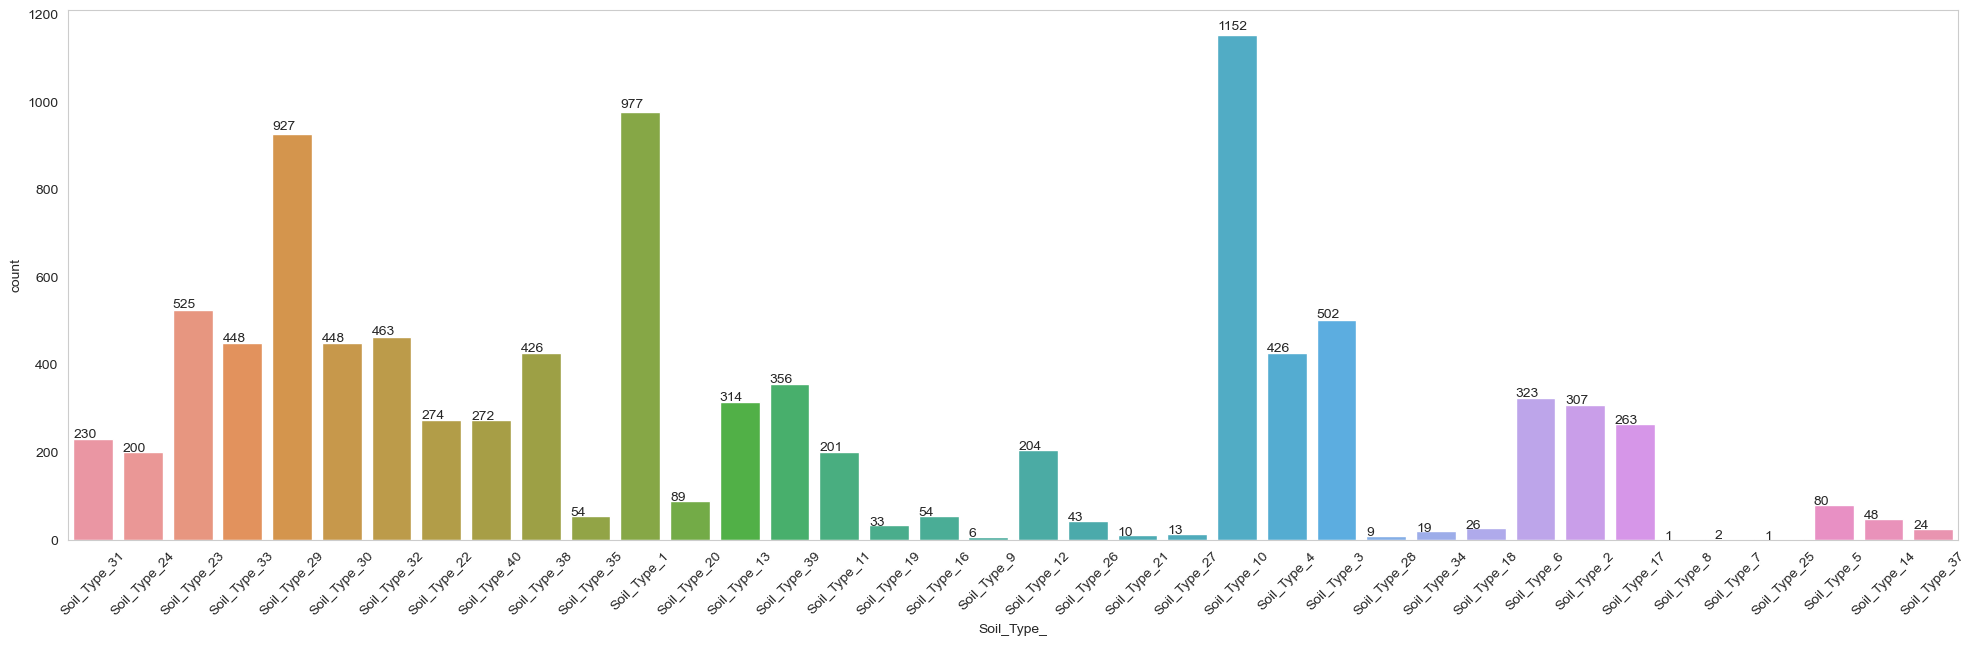

In [9]:
plt.figure(figsize=(20,6))
ax=sns.countplot(train_Soil_Type['Soil_Type_'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
plt.tight_layout()
plt.grid(axis="y")
plt.xticks(rotation=45);

In [10]:
train_Soil_Type["Soil_Type_"].value_counts()

Soil_Type_10    1152
Soil_Type_1      977
Soil_Type_29     927
Soil_Type_23     525
Soil_Type_3      502
Soil_Type_32     463
Soil_Type_33     448
Soil_Type_30     448
Soil_Type_38     426
Soil_Type_4      426
Soil_Type_39     356
Soil_Type_6      323
Soil_Type_13     314
Soil_Type_2      307
Soil_Type_22     274
Soil_Type_40     272
Soil_Type_17     263
Soil_Type_31     230
Soil_Type_12     204
Soil_Type_11     201
Soil_Type_24     200
Soil_Type_20      89
Soil_Type_5       80
Soil_Type_35      54
Soil_Type_16      54
Soil_Type_14      48
Soil_Type_26      43
Soil_Type_19      33
Soil_Type_18      26
Soil_Type_37      24
Soil_Type_34      19
Soil_Type_27      13
Soil_Type_21      10
Soil_Type_28       9
Soil_Type_9        6
Soil_Type_7        2
Soil_Type_8        1
Soil_Type_25       1
Name: Soil_Type_, dtype: int64

In [11]:
# I will drop Soil_type that less than 100 observation
df_values = pd.DataFrame(train_Soil_Type["Soil_Type_"].value_counts())
drop_columns = df_values[df_values["Soil_Type_"] <100].index
drop_columns

Index(['Soil_Type_20', 'Soil_Type_5', 'Soil_Type_35', 'Soil_Type_16',
       'Soil_Type_14', 'Soil_Type_26', 'Soil_Type_19', 'Soil_Type_18',
       'Soil_Type_37', 'Soil_Type_34', 'Soil_Type_27', 'Soil_Type_21',
       'Soil_Type_28', 'Soil_Type_9', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_25'],
      dtype='object')

Index(['Soil_Type_20', 'Soil_Type_5', 'Soil_Type_35', 'Soil_Type_16',
       'Soil_Type_14', 'Soil_Type_26', 'Soil_Type_19', 'Soil_Type_18',
       'Soil_Type_37', 'Soil_Type_34', 'Soil_Type_27', 'Soil_Type_21',
       'Soil_Type_28', 'Soil_Type_9', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_25'],
      dtype='object')

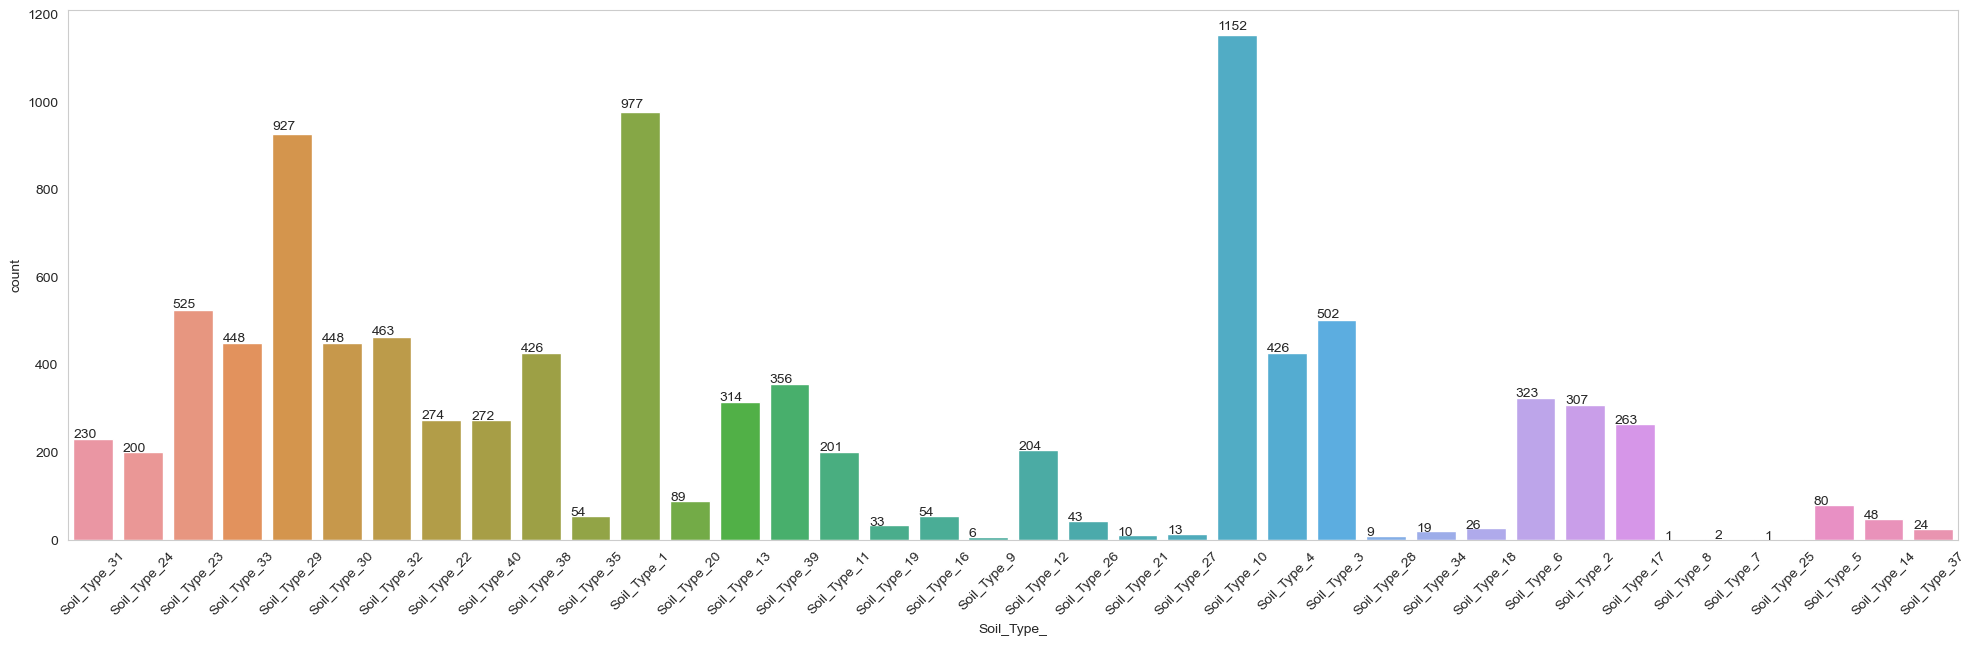

In [12]:
Soil_Type_Fields = ['Soil_Type_'+ str(i) for i in range(1,41)]
train_Soil_Type = df[Soil_Type_Fields]
train_Soil_Type['Soil_Type_'] = train_Soil_Type.idxmax(axis = 1)
train_Soil_Type['Soil_Type_']

plt.figure(figsize=(20,6))
ax=sns.countplot(train_Soil_Type['Soil_Type_'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
plt.tight_layout()
plt.grid(axis="y")
plt.xticks(rotation=45);

train_Soil_Type["Soil_Type_"].value_counts()

# I will drop Soil_type that less than 100 observation
df_values = pd.DataFrame(train_Soil_Type["Soil_Type_"].value_counts())
drop_columns = df_values[df_values["Soil_Type_"] <100].index
drop_columns

In [13]:
train_Soil_Type["Soil_Type_"].value_counts()

Soil_Type_10    1152
Soil_Type_1      977
Soil_Type_29     927
Soil_Type_23     525
Soil_Type_3      502
Soil_Type_32     463
Soil_Type_33     448
Soil_Type_30     448
Soil_Type_38     426
Soil_Type_4      426
Soil_Type_39     356
Soil_Type_6      323
Soil_Type_13     314
Soil_Type_2      307
Soil_Type_22     274
Soil_Type_40     272
Soil_Type_17     263
Soil_Type_31     230
Soil_Type_12     204
Soil_Type_11     201
Soil_Type_24     200
Soil_Type_20      89
Soil_Type_5       80
Soil_Type_35      54
Soil_Type_16      54
Soil_Type_14      48
Soil_Type_26      43
Soil_Type_19      33
Soil_Type_18      26
Soil_Type_37      24
Soil_Type_34      19
Soil_Type_27      13
Soil_Type_21      10
Soil_Type_28       9
Soil_Type_9        6
Soil_Type_7        2
Soil_Type_8        1
Soil_Type_25       1
Name: Soil_Type_, dtype: int64

In [14]:
# I will drop Soil_type that less than 100 observation
df_values = pd.DataFrame(train_Soil_Type["Soil_Type_"].value_counts())
drop_columns = df_values[df_values["Soil_Type_"] <100].index
drop_columns

Index(['Soil_Type_20', 'Soil_Type_5', 'Soil_Type_35', 'Soil_Type_16',
       'Soil_Type_14', 'Soil_Type_26', 'Soil_Type_19', 'Soil_Type_18',
       'Soil_Type_37', 'Soil_Type_34', 'Soil_Type_27', 'Soil_Type_21',
       'Soil_Type_28', 'Soil_Type_9', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_25'],
      dtype='object')

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [38]:
df.isnull().sum().sum()

0

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [40]:
numeric_cols = []

for col in df.columns:
    if df[col].nunique() > 7 : numeric_cols.append(col)
print(numeric_cols)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


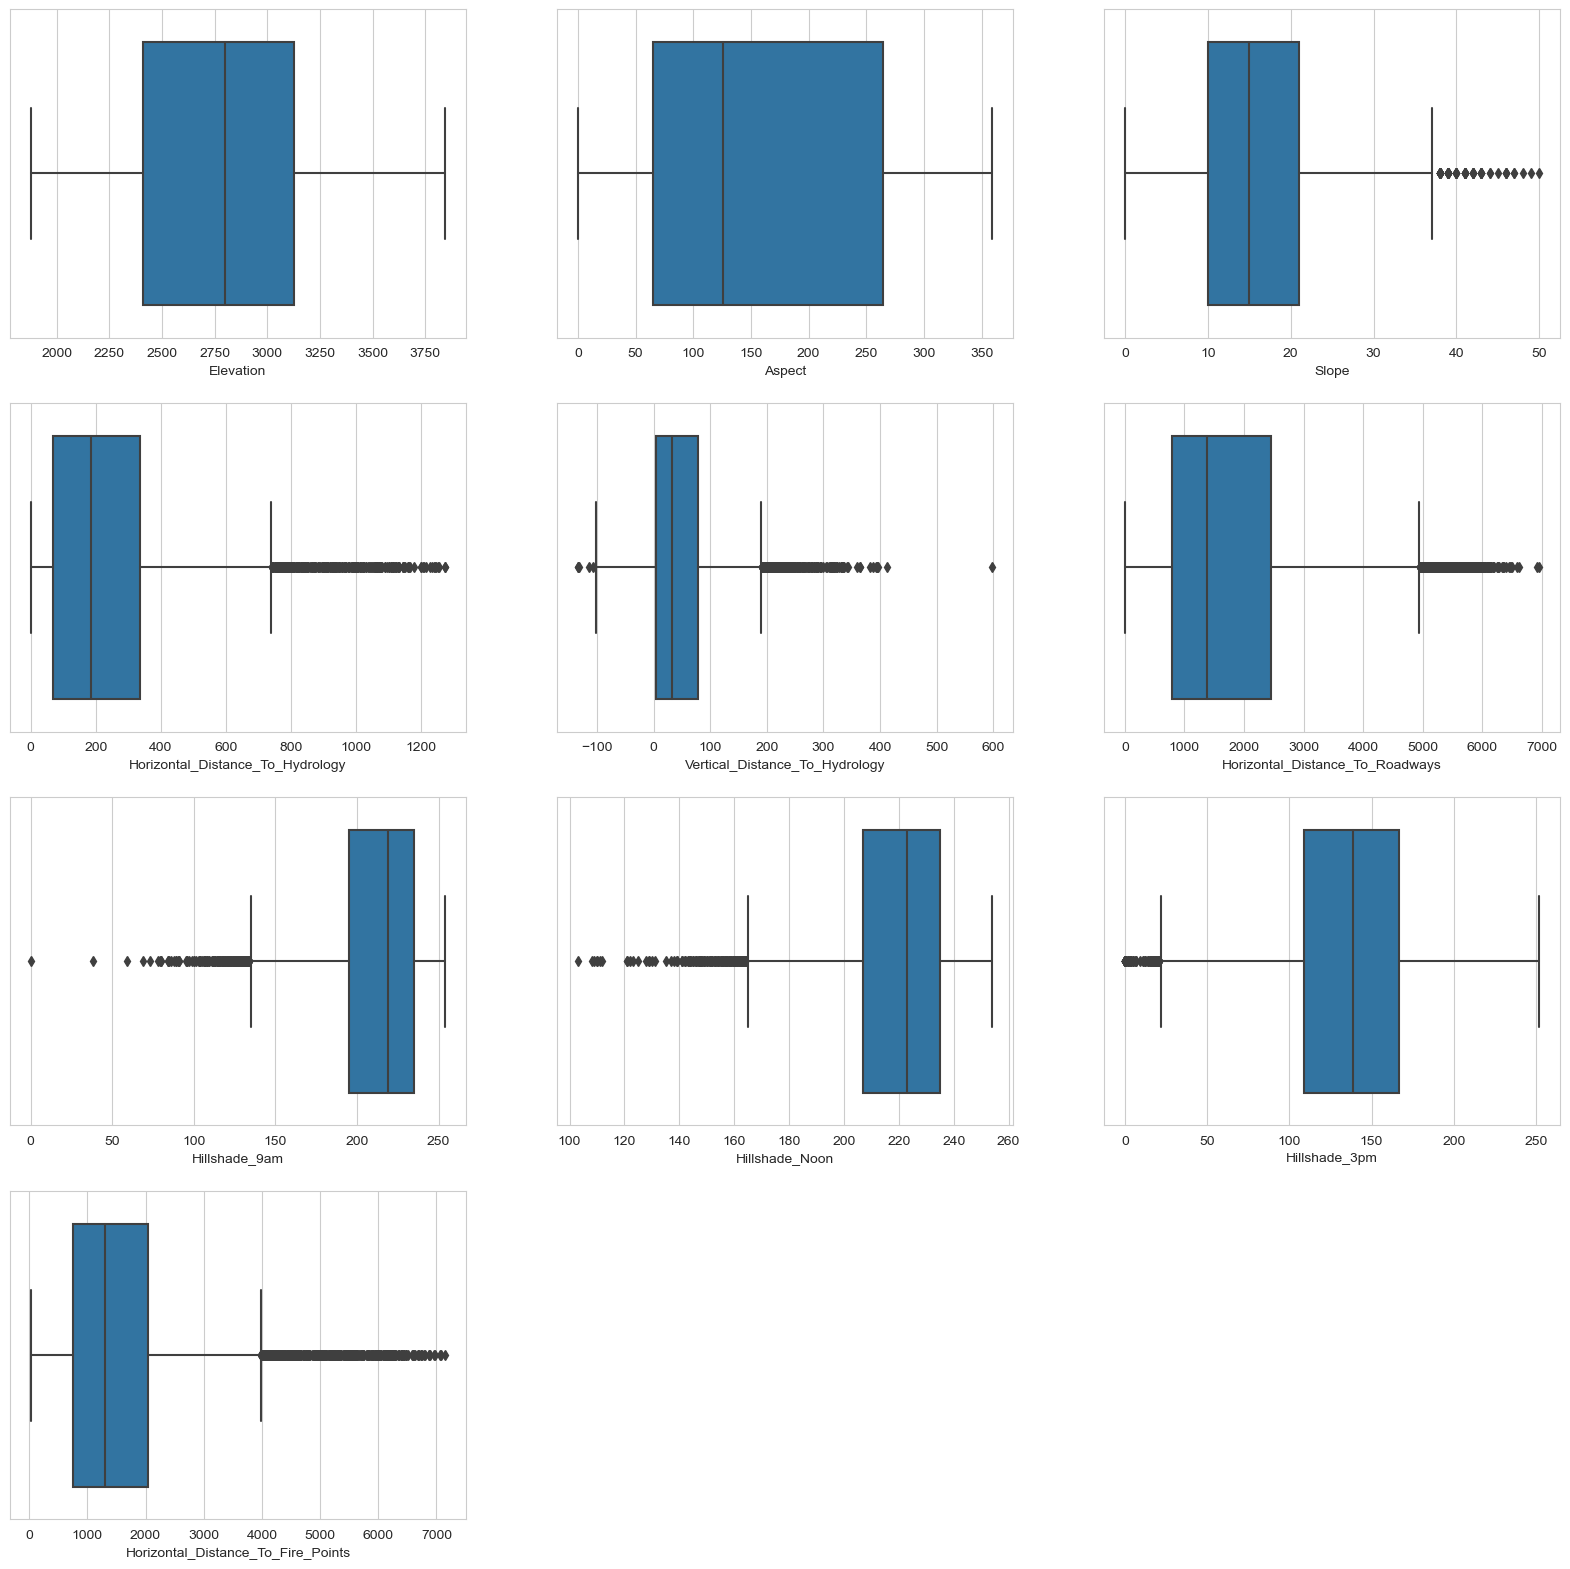

In [49]:
index = 0
plt.figure(figsize=(20,20))
for feature in numeric_cols:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=feature,data=df)

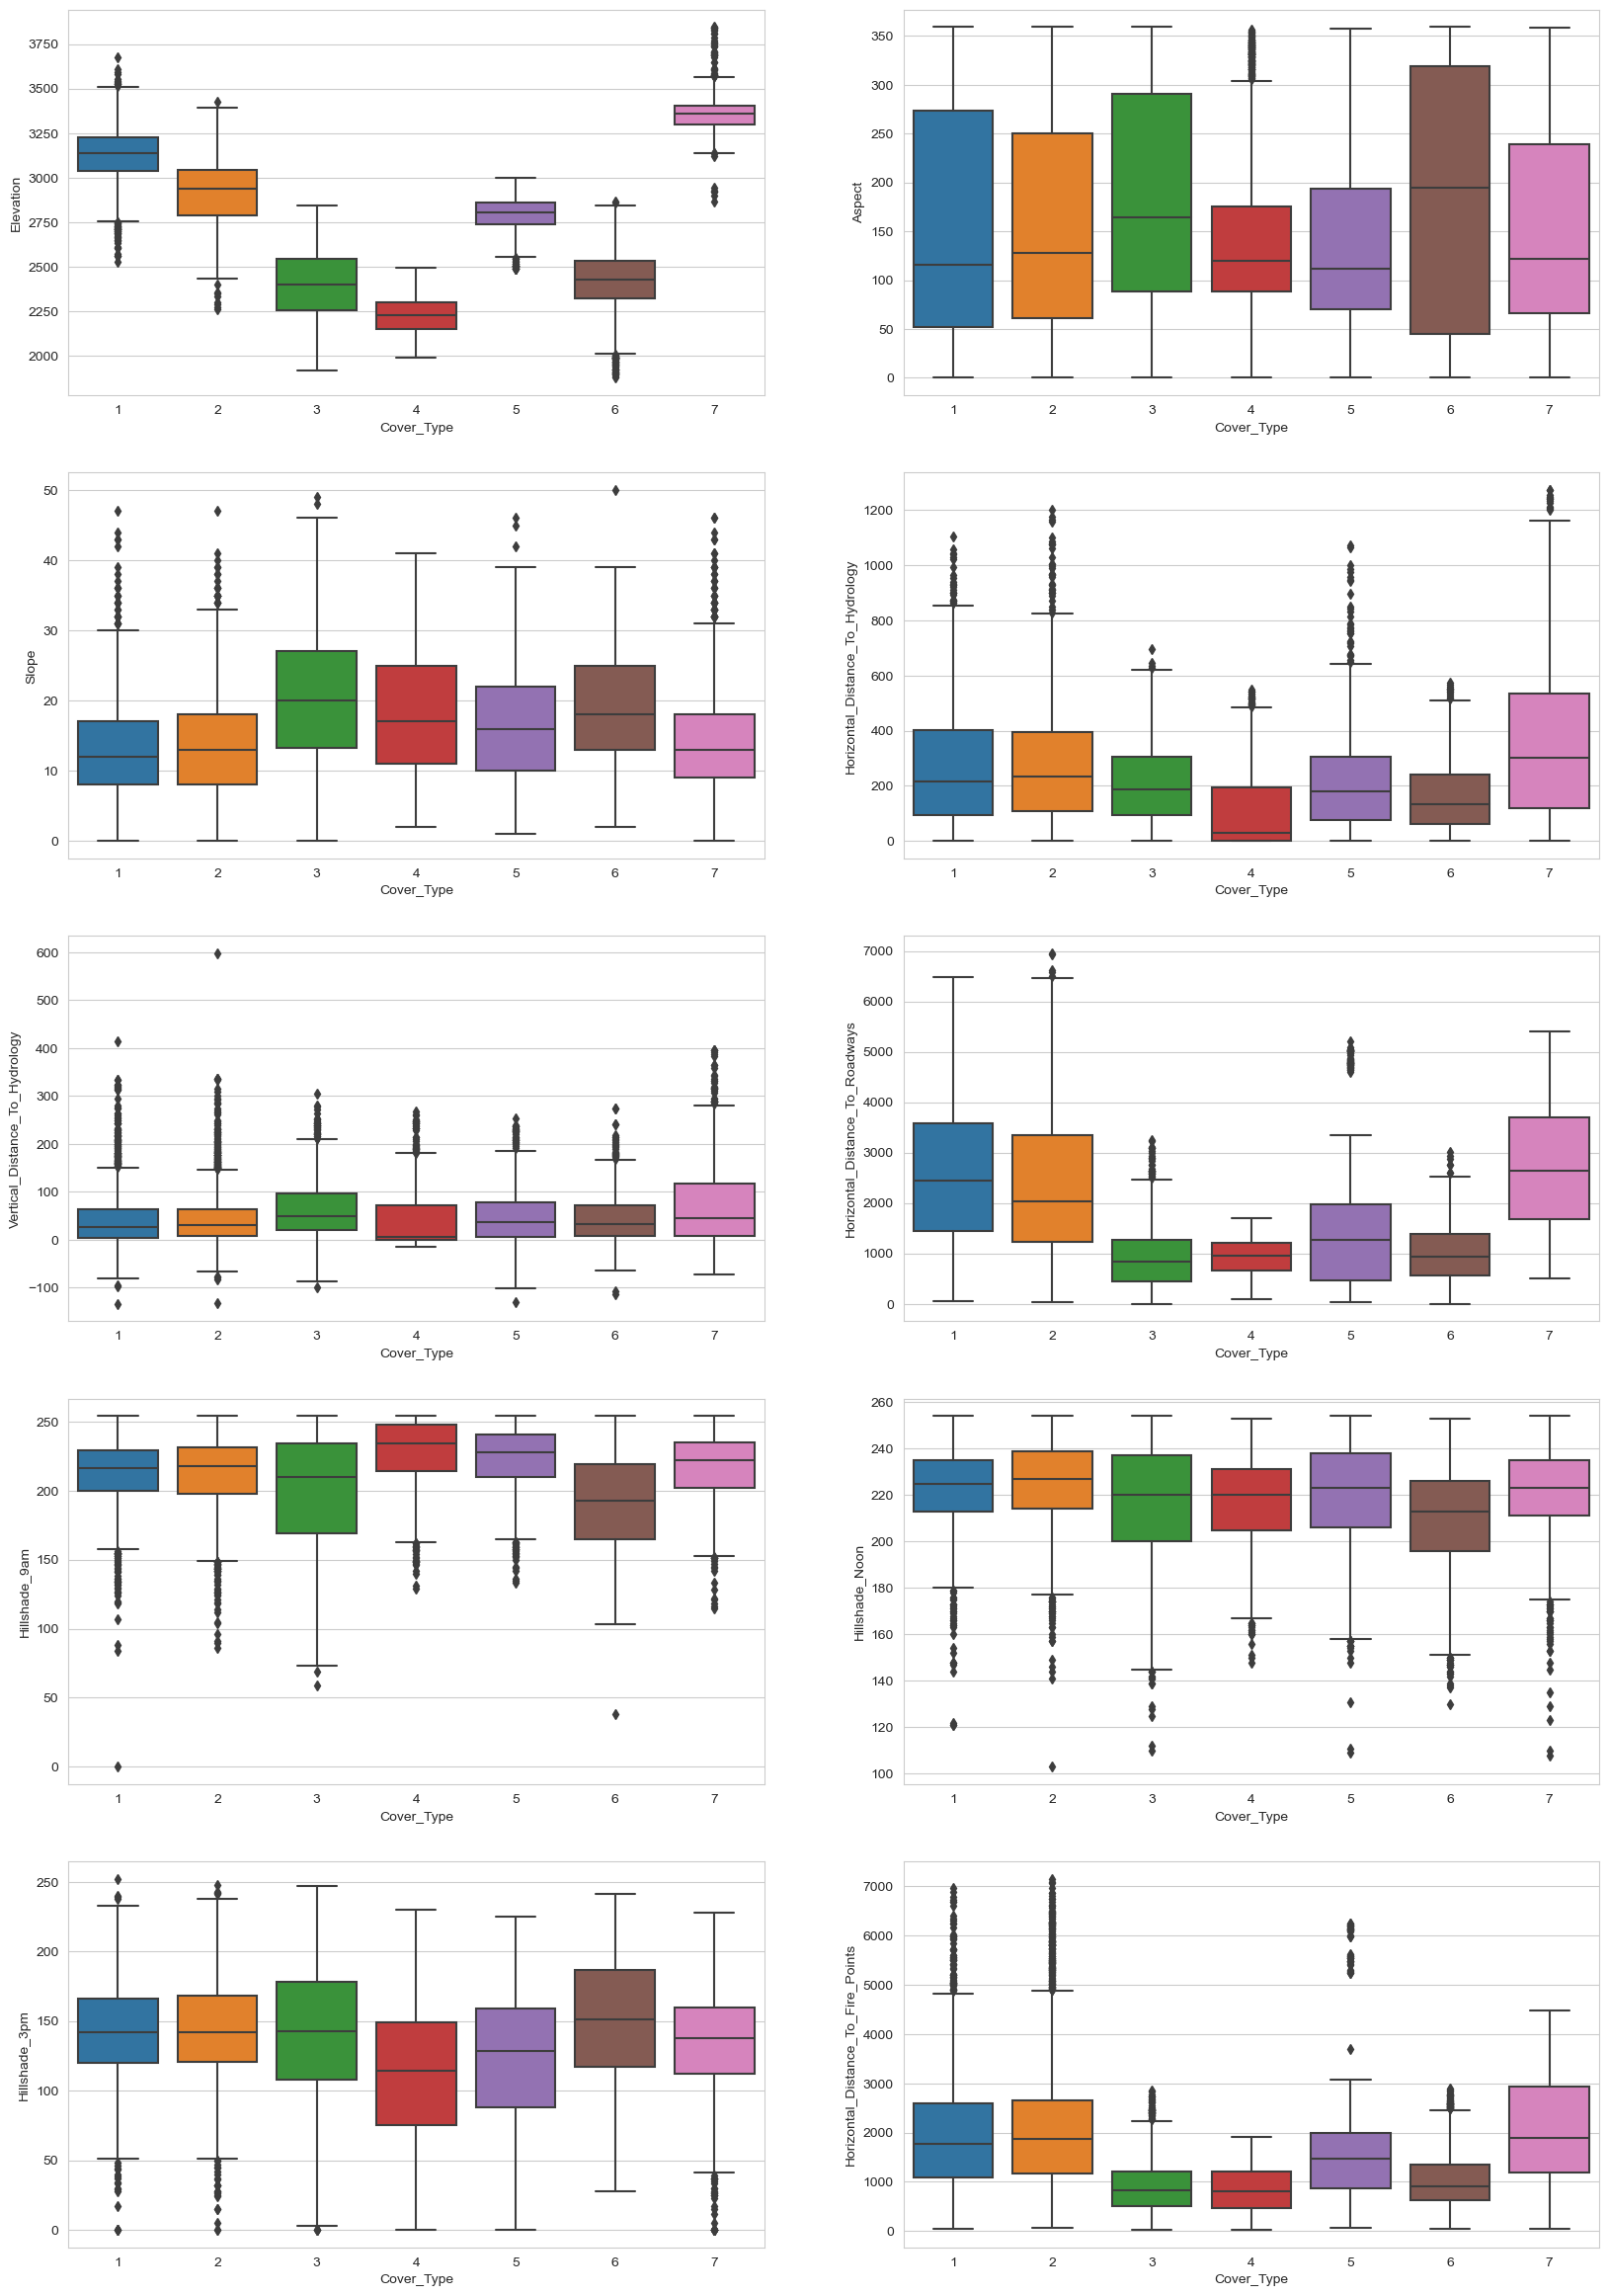

In [50]:
index = 0
plt.figure(figsize=(20,30))
for feature in numeric_cols:
    index += 1
    plt.subplot(5,2,index)
    sns.boxplot(x='Cover_Type',y=feature,data=df)

In [53]:
def detect_outlier(col):
    print('column name : ',col)
    print("--"*20)
    Q1 = df[col].quantile(0.25)
    print("Q1 : ", Q1)
    Q3 = df[col].quantile(0.75)
    print("Q3 : ", Q3)
    IQR = Q3 - Q1
    print("IQR : ", IQR )
    lower_lim = Q1 - 1.5*IQR
    print("lower limit : ", lower_lim)
    upper_lim = Q3 +1.5*IQR
    print("upper limit : ", upper_lim)
    cnt_of_low = (df[col] < lower_lim).sum()
    print("count of lower values : ", cnt_of_low)
    cnt_of_upper = (df[col] > upper_lim).sum()
    print("count of upper values : ", cnt_of_upper)
    print(" ")


In [54]:
for i in numeric_cols:
    detect_outlier(i)

column name :  Elevation
----------------------------------------
Q1 :  2411.0
Q3 :  3125.0
IQR :  714.0
lower limit :  1340.0
upper limit :  4196.0
count of lower values :  0
count of upper values :  0
 
column name :  Aspect
----------------------------------------
Q1 :  65.0
Q3 :  264.0
IQR :  199.0
lower limit :  -233.5
upper limit :  562.5
count of lower values :  0
count of upper values :  0
 
column name :  Slope
----------------------------------------
Q1 :  10.0
Q3 :  21.0
IQR :  11.0
lower limit :  -6.5
upper limit :  37.5
count of lower values :  0
count of upper values :  78
 
column name :  Horizontal_Distance_To_Hydrology
----------------------------------------
Q1 :  67.0
Q3 :  336.0
IQR :  269.0
lower limit :  -336.5
upper limit :  739.5
count of lower values :  0
count of upper values :  314
 
column name :  Vertical_Distance_To_Hydrology
----------------------------------------
Q1 :  5.0
Q3 :  79.0
IQR :  74.0
lower limit :  -106.0
upper limit :  190.0
count of lower 

### Deal with Outliers

#### *ii. Drop Outliers*

In [58]:
df.shape

(9750, 55)

In [59]:
df1 = df.copy()

In [61]:
# I have decided to drop outliers over 1,5 iqr

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 +1.5*IQR
    
    df1 = df1[(df1[col]<upper_lim) & (df1[col]>lower_lim)]

In [62]:
df1.shape

(7973, 55)

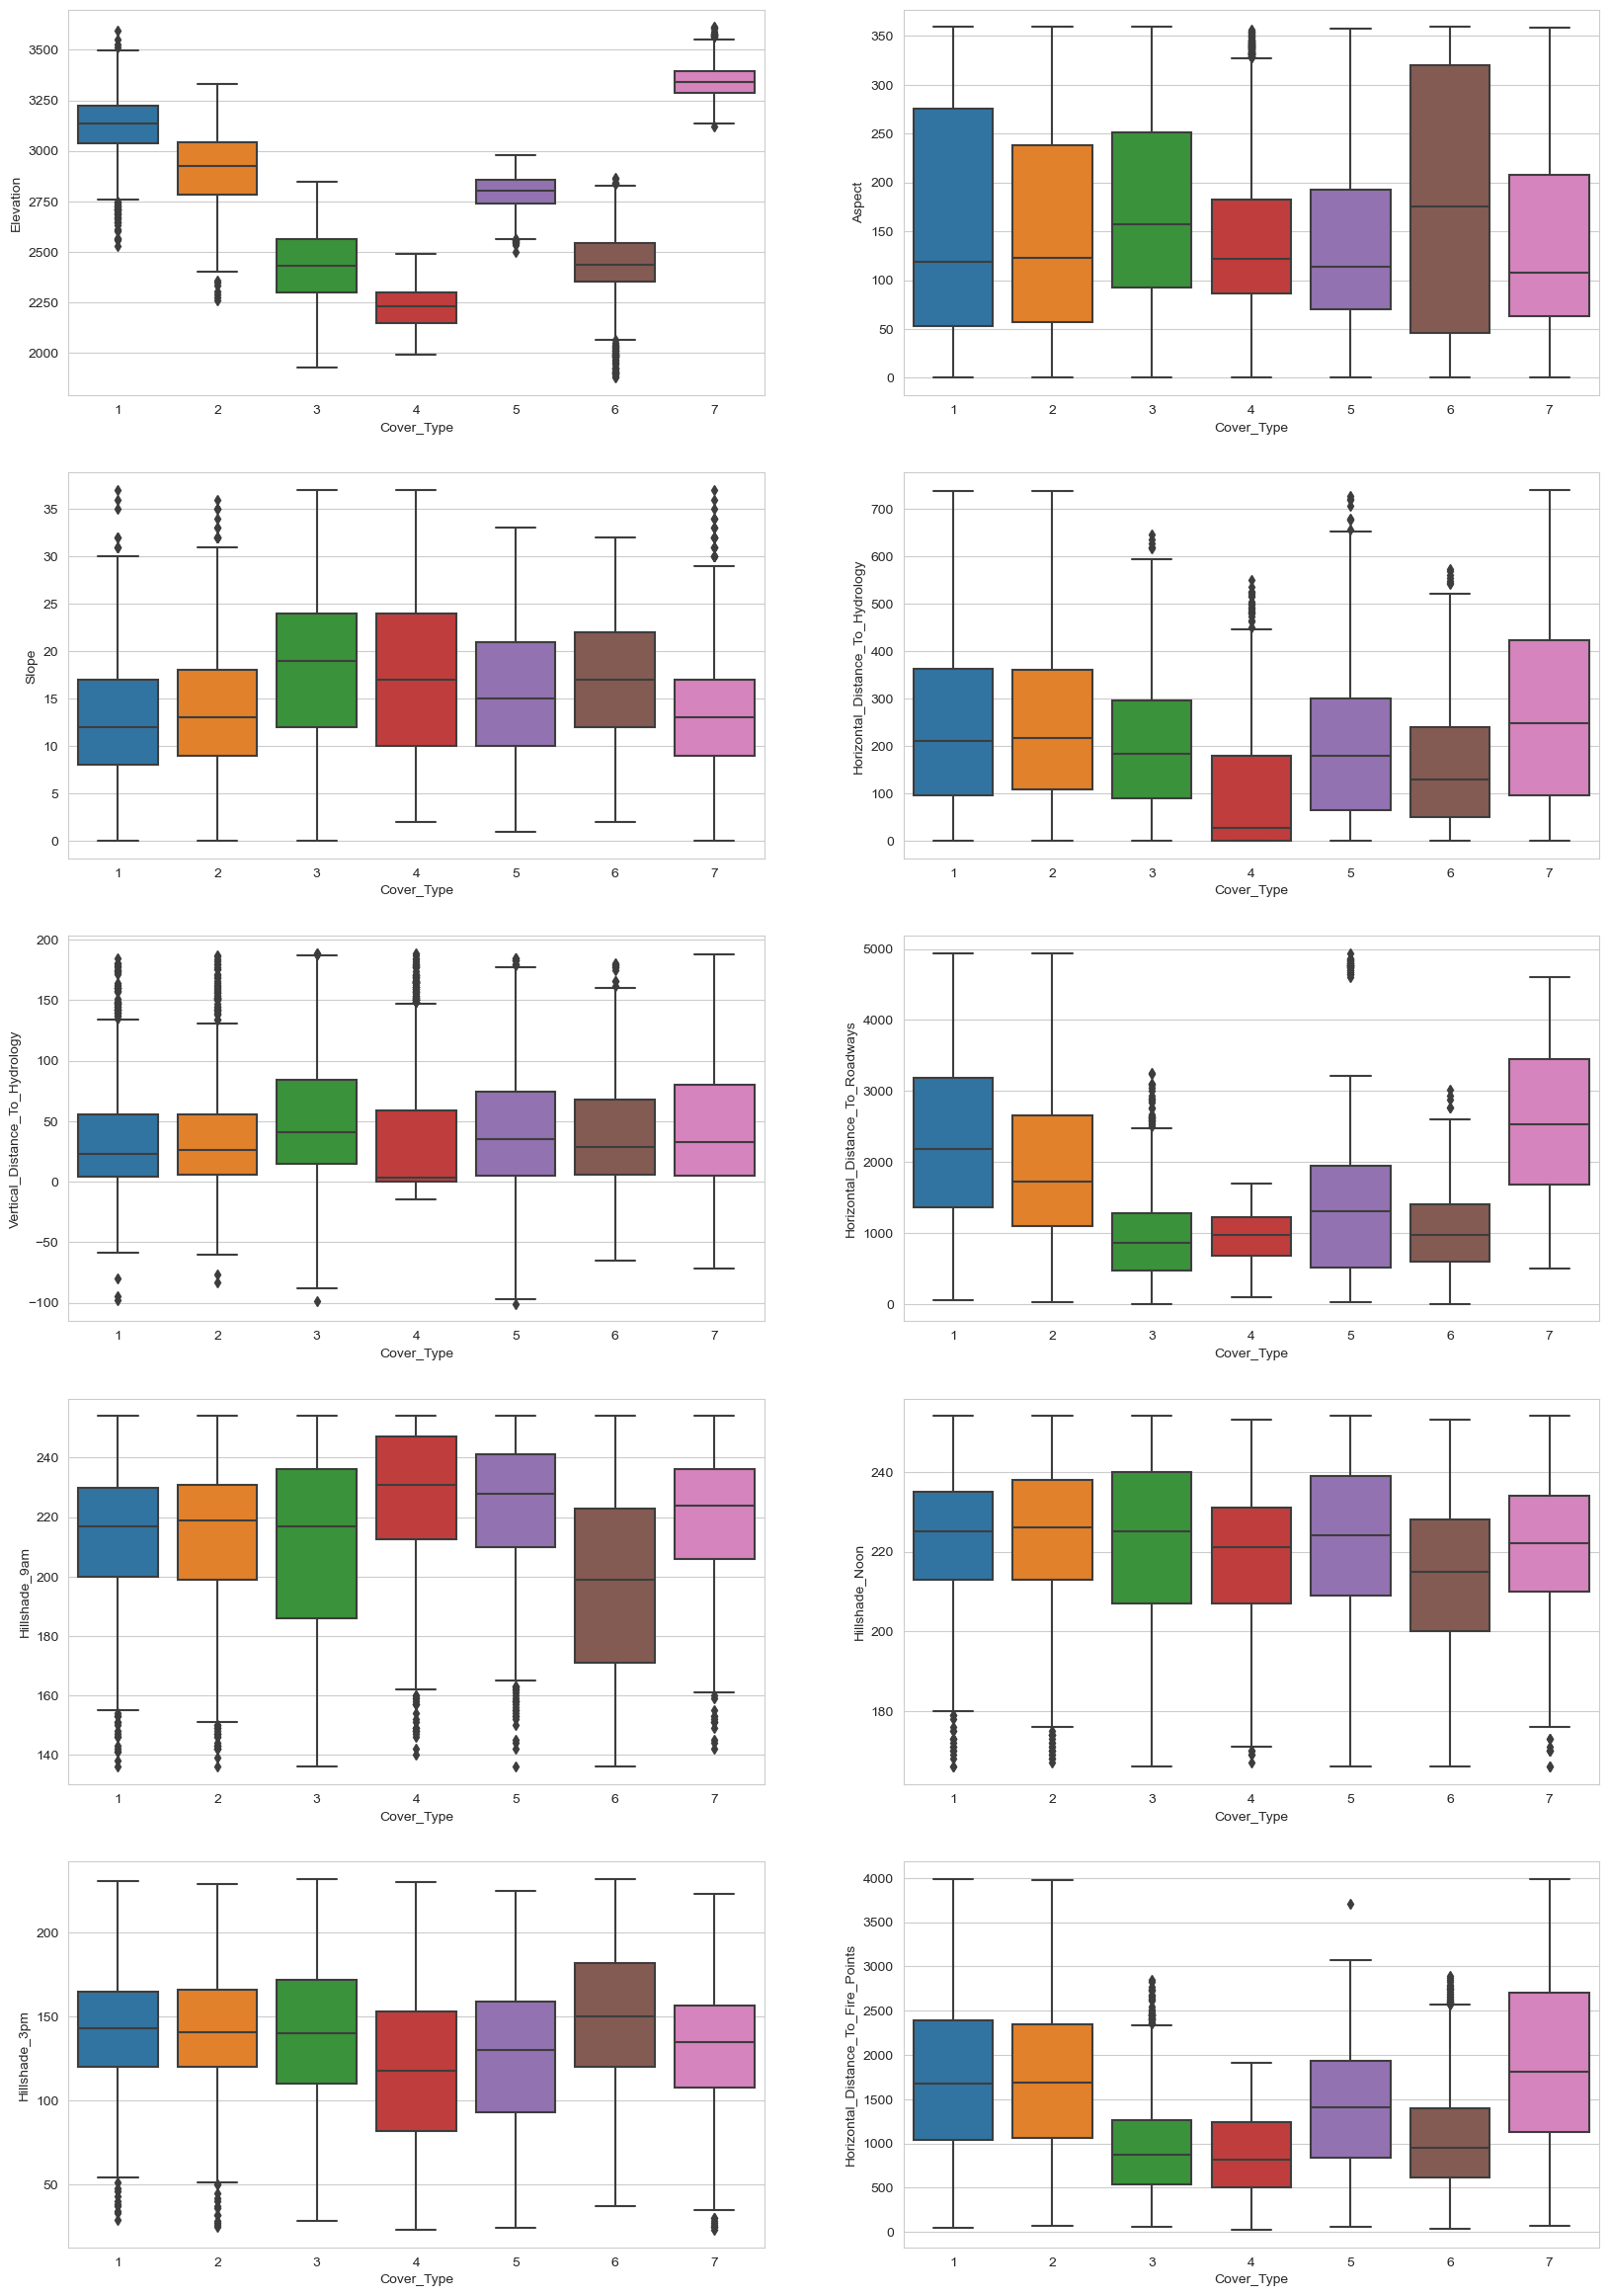

In [63]:
index = 0
plt.figure(figsize=(20,30))
for feature in numeric_cols:
    index += 1
    plt.subplot(5,2,index)
    sns.boxplot(x='Cover_Type',y=feature,data=df1)

In [64]:
len(df) - len(df1)

1777

In [76]:
df1 = df1.reset_index(drop=True)

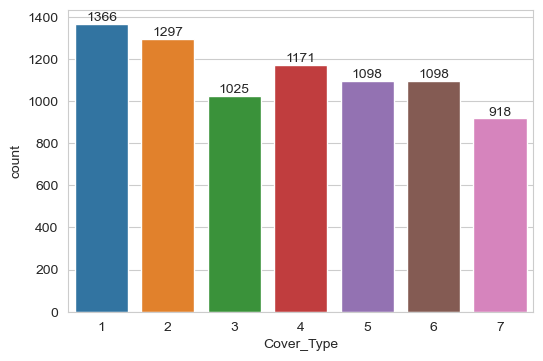

In [81]:
ax = sns.countplot(df1.Cover_Type)
ax.bar_label(ax.containers[0]);

In [87]:
df1.Cover_Type.value_counts(normalize=True).round(2)

1    0.17
2    0.16
4    0.15
5    0.14
6    0.14
3    0.13
7    0.12
Name: Cover_Type, dtype: float64

### Now, let's take a closer look at correlation of continuous columns.

In [71]:
df1[numeric_cols].corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.048579,-0.261742,0.372287,0.053447,0.577005,0.084618,0.152486,0.053024,0.490809
Aspect,-0.048579,1.000000,0.053592,-0.001058,0.022946,0.028288,-0.621510,0.332118,0.636820,-0.098745
Slope,-0.261742,0.053592,1.000000,-0.022303,0.297111,-0.201734,-0.098652,-0.494486,-0.314959,-0.160612
Horizontal_Distance_To_Hydrology,0.372287,-0.001058,-0.022303,1.000000,0.591409,0.111597,-0.014560,0.036014,0.036054,0.171286
Vertical_Distance_To_Hydrology,0.053447,0.022946,0.297111,0.591409,1.000000,-0.041590,-0.044627,-0.135775,-0.075286,0.021046
Horizontal_Distance_To_Roadways,0.577005,0.028288,-0.201734,0.111597,-0.041590,1.000000,-0.014642,0.165629,0.124940,0.419659
Hillshade_9am,0.084618,-0.621510,-0.098652,-0.014560,-0.044627,-0.014642,1.000000,-0.104670,-0.832878,0.100039
Hillshade_Noon,0.152486,0.332118,-0.494486,0.036014,-0.135775,0.165629,-0.104670,1.000000,0.614975,0.035932
Hillshade_3pm,0.053024,0.636820,-0.314959,0.036054,-0.075286,0.124940,-0.832878,0.614975,1.000000,-0.031431
Horizontal_Distance_To_Fire_Points,0.490809,-0.098745,-0.160612,0.171286,0.021046,0.419659,0.100039,0.035932,-0.031431,1.000000


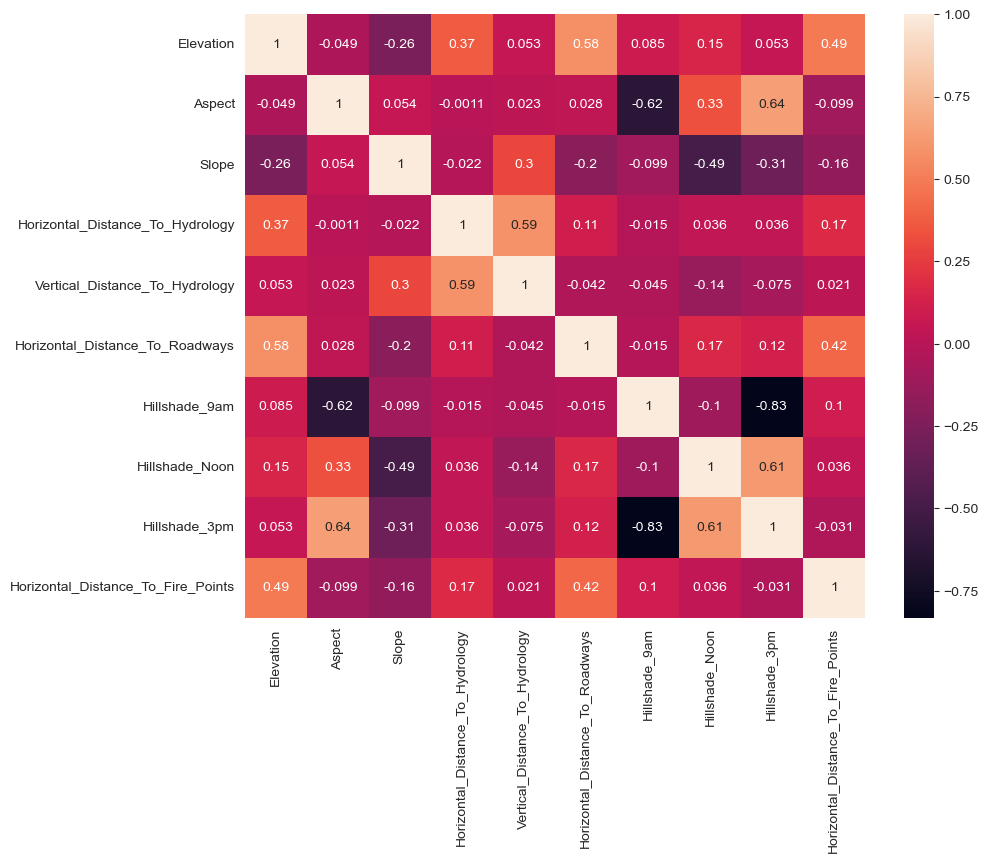

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(df1[numeric_cols].corr(), annot=True);

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, Hillshade_3pm and Hillshade_9am are highly correlated. So I decided to drop Hillshade_3pm.


- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [89]:
df1['Hypo_Distance_To_Hydrology'] = (df1['Horizontal_Distance_To_Hydrology']**2 + df1['Vertical_Distance_To_Hydrology']**2)**0.5

In [90]:
df1.drop(columns=["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology"], inplace=True)

In [102]:
df1.drop(columns="Hillshade_3pm", inplace=True)

In [103]:
df1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypo_Distance_To_Hydrology
0,3183,72,12,2640,234,215,1647,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,85.475143
1,2799,24,16,1084,210,205,3129,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,121.198185
2,3220,120,14,2466,243,228,3887,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,150.748134
3,3014,79,17,3292,240,207,808,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,120.037494
4,3169,73,9,1988,230,223,3037,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,427.299661


In [104]:
numeric_cols = []

for col in df1.columns:
    if df1[col].nunique() > 7 : numeric_cols.append(col)
print(numeric_cols)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points', 'Hypo_Distance_To_Hydrology']


<AxesSubplot:>

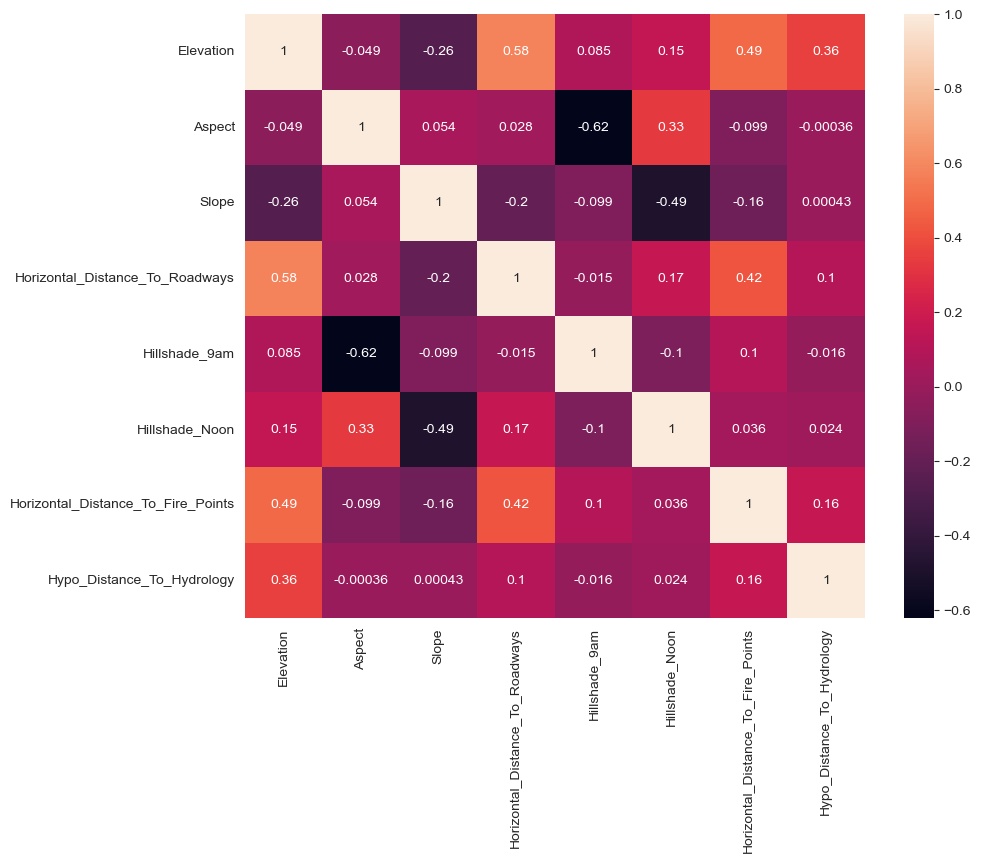

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(df1[numeric_cols].corr(), annot=True)

In [ ]:
df1.shape

In [106]:
df1.to_csv("treetypes_cleaned.csv", index = False)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score

### Data Preprocessing

In [107]:
df = pd.read_csv("treetypes_cleaned.csv")

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [114]:
df.shape

(7973, 53)

In [110]:
X = df.drop(columns="Cover_Type")
y = df["Cover_Type"]

In [111]:
df.Cover_Type.value_counts() # value counts are not balanced enough so I will use the stratify parameter 

1    1366
2    1297
4    1171
5    1098
6    1098
3    1025
7     918
Name: Cover_Type, dtype: int64

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [113]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (6378, 52)
Train target shape   :  (6378,)
Test features shape  :  (1595, 52)
Test target shape    :  (1595,)


### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [127]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
    

In [119]:
scaler = MinMaxScaler() # will be use in pipeline
modelSVM = SVC()

In [121]:
from sklearn.pipeline import Pipeline

model_svm = Pipeline([("scaler", scaler),("svm", modelSVM)])

In [122]:
model_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [123]:
y_pred = model_svm.predict(X_test)
y_train_pred = model_svm.predict(X_train)

In [ ]:
SVM_accuracy_test = accuracy_score(y_test, y_pred)
SVM_accuracy_train = accuracy_score(y_train, y_train_pred)

svm_f1_test = f1_score(y_test, y_pred, average='macro')
svm_f1_train = f1_score(y_train, y_train_pred, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

In [138]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    #plot_confusion_matrix(model_svm, X_test, y_test)
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    #plot_confusion_matrix(model_svm, X_train, y_train)


In [139]:
eval_metric(model_svm, X_train, y_train, X_test, y_test)

Test_Set
[[171  64   1   0  13   0  24]
 [ 48 151   4   1  39  13   3]
 [  0   1  94  39  14  57   0]
 [  0   0  10 216   0   8   0]
 [ 10  34   7   0 156  13   0]
 [  1  13  29  19   8 150   0]
 [ 28   0   0   0   0   0 156]]
              precision    recall  f1-score   support

           1       0.66      0.63      0.64       273
           2       0.57      0.58      0.58       259
           3       0.65      0.46      0.54       205
           4       0.79      0.92      0.85       234
           5       0.68      0.71      0.69       220
           6       0.62      0.68      0.65       220
           7       0.85      0.85      0.85       184

    accuracy                           0.69      1595
   macro avg       0.69      0.69      0.69      1595
weighted avg       0.68      0.69      0.68      1595


Train_Set
[[748 203   0   0  36  11  95]
 [200 638  12   1 135  41  11]
 [  0   5 423 126  34 232   0]
 [  0   0  43 868   0  26   0]
 [ 25 151  27   0 638  37   0]
 [  0  42 

In [132]:
model_svm.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('svm', SVC())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'svm': SVC(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'svm__C': 1.0,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

In [135]:
from sklearn.model_selection import GridSearchCV

In [137]:
model_svm = Pipeline([("scaler", scaler),("svm", modelSVM)])

param_grid = {"svm__C" : np.linspace(0.01, 1, 10),
              "svm__class_weight" : ["balanced", None]}


grid_svm_model = GridSearchCV(model_svm, param_grid=param_grid, verbose=2, scoring="f1_macro", n_jobs=-1)
grid_svm_model.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'svm__class_weight': ['balanced', None],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['rbf', 'linear', 'ploy', 'sigmoid']},
             scoring='f1_macro', verbose=2)

In [140]:
grid_svm_model.best_params_

{'svm__C': 1.0,
 'svm__class_weight': 'balanced',
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf'}

In [141]:
grid_svm_model.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svm', SVC(class_weight='balanced'))])

In [142]:
y_pred = grid_svm_model.predict(X_test)
y_train_pred = grid_svm_model.predict(X_train)

In [143]:
eval_metric(grid_svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[158  64   1   0  21   0  29]
 [ 46 144   4   1  48  13   3]
 [  0   0 100  36  15  54   0]
 [  0   0  19 207   0   8   0]
 [  8  23   7   0 169  13   0]
 [  1  11  34  14  10 150   0]
 [ 21   0   0   0   0   0 163]]
              precision    recall  f1-score   support

           1       0.68      0.58      0.62       273
           2       0.60      0.56      0.57       259
           3       0.61      0.49      0.54       205
           4       0.80      0.88      0.84       234
           5       0.64      0.77      0.70       220
           6       0.63      0.68      0.66       220
           7       0.84      0.89      0.86       184

    accuracy                           0.68      1595
   macro avg       0.68      0.69      0.69      1595
weighted avg       0.68      0.68      0.68      1595


Train_Set
[[709 211   0   0  46  12 115]
 [186 616  13   1 170  40  12]
 [  0   2 443 107  36 232   0]
 [  0   0  57 855   0  25   0]
 [ 22 110  28   0 680  38   0]
 [  0  41 

In [ ]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(grid_svm_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

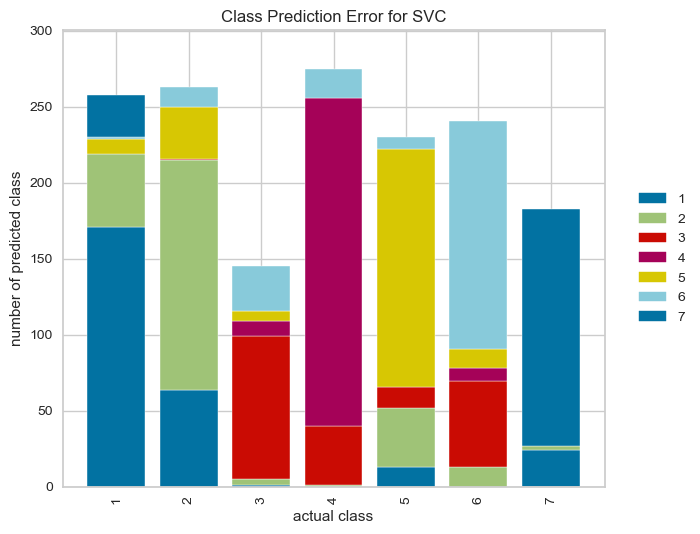

In [145]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(model_svm)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();



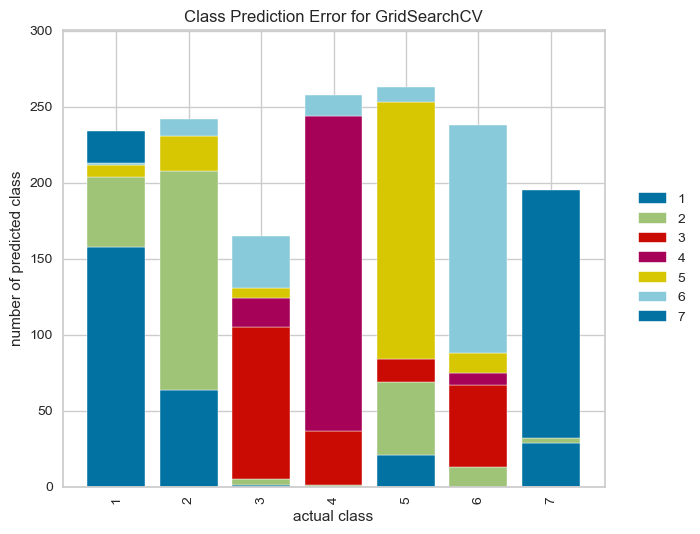

In [148]:
visualizer = ClassPredictionError(grid_svm_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();


### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)

In [86]:
modelTree_accuracy_test = accuracy_score(y_test, y_pred)
modelTree_accuracy_train = accuracy_score(y_train, y_train_pred)

modelTree_f1_test = f1_score(y_test, y_pred, average='macro')
modelTree_f1_train = f1_score(y_train, y_train_pred, average='macro')

modelTree_accuracy_test, modelTree_accuracy_train, modelTree_f1_test, modelTree_f1_train

(0.7724137931034483, 1.0, 0.7799666326040379, 1.0)

In [87]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [88]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[179  73   0   0   5   0  16]
 [ 50 167   6   0  24   8   4]
 [  0   5 146  10   5  39   0]
 [  0   2   8 216   0   8   0]
 [ 15  12   3   0 188   2   0]
 [  0   8  34   7   6 165   0]
 [ 13   0   0   0   0   0 171]]
              precision    recall  f1-score   support

           1       0.70      0.66      0.68       273
           2       0.63      0.64      0.63       259
           3       0.74      0.71      0.73       205
           4       0.93      0.92      0.93       234
           5       0.82      0.85      0.84       220
           6       0.74      0.75      0.75       220
           7       0.90      0.93      0.91       184

    accuracy                           0.77      1595
   macro avg       0.78      0.78      0.78      1595
weighted avg       0.77      0.77      0.77      1595


Train_Set
[[1093    0    0    0    0    0    0]
 [   0 1038    0    0    0    0    0]
 [   0    0  820    0    0    0    0]
 [   0    0    0  937    0    0    0]
 [   0    0  

In [89]:
# we can see overfittig situation,  we should cross validation

In [90]:
from sklearn.model_selection import cross_validate, cross_val_score

In [91]:
model = DecisionTreeClassifier()

scores = cross_validate(model, X_train, y_train, cv=10, scoring=["accuracy", "precision_micro", "recall_micro", "f1_micro"])

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:].round(2)

test_accuracy           0.75
test_precision_micro    0.75
test_recall_micro       0.75
test_f1_micro           0.75
dtype: float64

In [92]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [93]:
# Finding the best hyperparameters

dt_model = DecisionTreeClassifier()

param_grid = {"criterion" : ["gini", "entropy"],
              "max_depth" : [5,6,8],
              "min_samples_leaf": [1,2,3],
              "class_weight" : ["balanced", "auto"]}

grid_dt_model = GridSearchCV(dt_model, param_grid=param_grid, scoring="f1_micro", n_jobs=-1)

In [94]:
grid_dt_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'auto'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 8],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='f1_micro')

In [95]:
grid_dt_model.best_score_

0.7116631630708711

In [96]:
grid_dt_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_leaf=2)

In [97]:
grid_dt_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 2}

In [98]:
eval_metric(grid_dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[170  54   1   0  17   1  30]
 [ 51 136   8   1  43  12   8]
 [  0   2 129  18   9  47   0]
 [  0   1  12 220   0   1   0]
 [  0  11   8   0 194   7   0]
 [  0   0  47  19  10 144   0]
 [ 13   0   0   0   0   0 171]]
              precision    recall  f1-score   support

           1       0.73      0.62      0.67       273
           2       0.67      0.53      0.59       259
           3       0.63      0.63      0.63       205
           4       0.85      0.94      0.89       234
           5       0.71      0.88      0.79       220
           6       0.68      0.65      0.67       220
           7       0.82      0.93      0.87       184

    accuracy                           0.73      1595
   macro avg       0.73      0.74      0.73      1595
weighted avg       0.72      0.73      0.72      1595


Train_Set
[[767 157   2   0  38   8 121]
 [221 557  22   1 168  51  18]
 [  0   0 554  68  24 174   0]
 [  0   0  14 919   0   4   0]
 [  0  55  25   0 771  27   0]
 [  0   0 

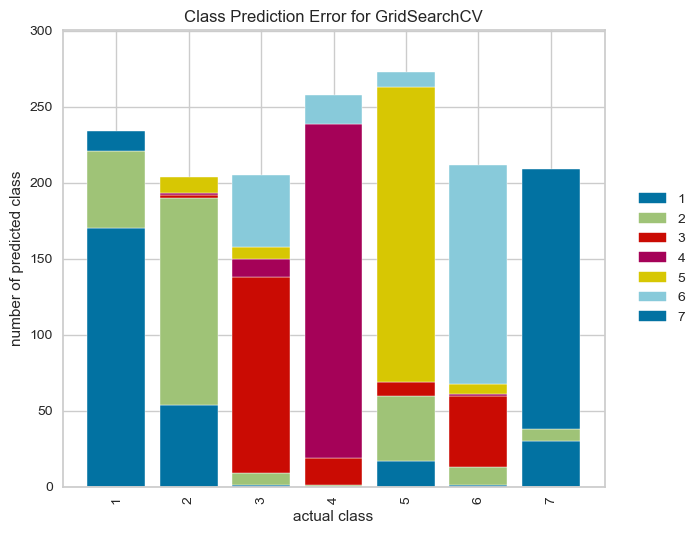

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [99]:
visualizer = ClassPredictionError(grid_dt_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [100]:
from sklearn.ensemble import  RandomForestClassifier

In [101]:
rf_model = RandomForestClassifier() # n_estimator = 100 as default

In [102]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

In [104]:
rfc_accuracy_test = accuracy_score(y_test, y_pred)
rfc_accuracy_train = accuracy_score(y_train, y_train_pred)

rfc_f1_test = f1_score(y_test, y_pred, average='macro')
rfc_f1_train = f1_score(y_train, y_train_pred, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.8294670846394985, 1.0, 0.8334948954773846, 1.0)

In [105]:
eval_metric(rf_model, X_train, y_train,X_test, y_test)

Test_Set
[[195  55   1   0   9   0  13]
 [ 44 176   4   0  24   8   3]
 [  0   4 156  14   3  28   0]
 [  0   0   1 231   0   2   0]
 [  2   2   4   0 211   1   0]
 [  0   5  25   5   3 182   0]
 [ 12   0   0   0   0   0 172]]
              precision    recall  f1-score   support

           1       0.77      0.71      0.74       273
           2       0.73      0.68      0.70       259
           3       0.82      0.76      0.79       205
           4       0.92      0.99      0.95       234
           5       0.84      0.96      0.90       220
           6       0.82      0.83      0.83       220
           7       0.91      0.93      0.92       184

    accuracy                           0.83      1595
   macro avg       0.83      0.84      0.83      1595
weighted avg       0.83      0.83      0.83      1595


Train_Set
[[1093    0    0    0    0    0    0]
 [   0 1038    0    0    0    0    0]
 [   0    0  820    0    0    0    0]
 [   0    0    0  937    0    0    0]
 [   0    0  

In [106]:
# we can see overfitting we should make cross validation

In [107]:
rf_model = RandomForestClassifier()

scores = cross_validate(rf_model, X_train, y_train, cv=10, scoring=["accuracy", "precision_micro", "recall_micro", "f1_micro"])

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_accuracy           0.832235
test_precision_micro    0.832235
test_recall_micro       0.832235
test_f1_micro           0.832235
dtype: float64

In [108]:
rf_model = RandomForestClassifier()

param_grid = {'criterion': ["entropy","gini"],
             'max_depth':[9, 11],
             'min_samples_split':[4,6],
             'n_estimators':[350, 400]}


In [109]:
grid_rf_model = GridSearchCV(rf_model, param_grid=param_grid, scoring="accuracy", verbose=2, n_jobs=-1)

grid_rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [9, 11],
                         'min_samples_split': [4, 6],
                         'n_estimators': [350, 400]},
             scoring='accuracy', verbose=2)

In [110]:
grid_rf_model.best_score_

0.7869261786219189

In [111]:
grid_rf_model.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_split': 4,
 'n_estimators': 350}

In [112]:
grid_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=4,
                       n_estimators=350)

In [115]:
rfc_accuracy_test = accuracy_score(y_test, y_test)
rfc_accuracy_train = accuracy_score(y_train, y_train_pred)

rfc_f1_test = f1_score(y_test, y_pred, average='macro')
rfc_f1_train = f1_score(y_train, y_train_pred, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(1.0, 1.0, 0.8334948954773846, 1.0)

In [113]:
eval_metric(grid_rf_model, X_train,y_train, X_test, y_test)

Test_Set
[[201  32   1   0  19   0  20]
 [ 63 142   1   1  38  11   3]
 [  0   4 141  17   5  38   0]
 [  0   0   1 231   0   2   0]
 [  1   6   5   0 207   1   0]
 [  0   3  31  12   5 169   0]
 [ 13   0   0   0   0   0 171]]
              precision    recall  f1-score   support

           1       0.72      0.74      0.73       273
           2       0.76      0.55      0.64       259
           3       0.78      0.69      0.73       205
           4       0.89      0.99      0.93       234
           5       0.76      0.94      0.84       220
           6       0.76      0.77      0.77       220
           7       0.88      0.93      0.90       184

    accuracy                           0.79      1595
   macro avg       0.79      0.80      0.79      1595
weighted avg       0.79      0.79      0.79      1595


Train_Set
[[986  45   0   0  38   6  18]
 [129 796   8   1  78  23   3]
 [  0   1 718  27  22  52   0]
 [  0   0   1 936   0   0   0]
 [  0   8   6   0 859   5   0]
 [  0   4 

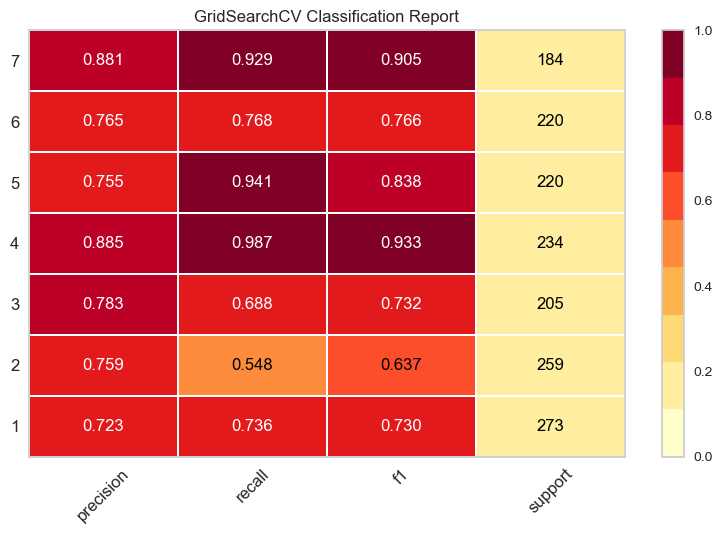

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [137]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(grid_rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

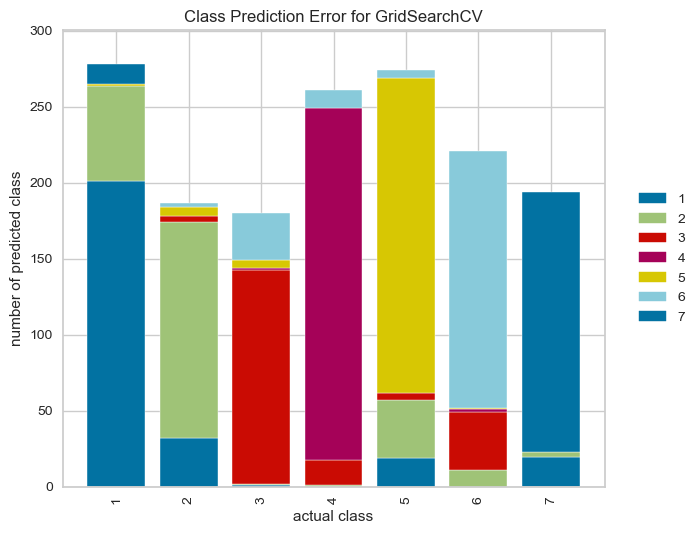

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [114]:
visualizer = ClassPredictionError(grid_rf_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [116]:
from xgboost import XGBClassifier

In [117]:
xgb_model = XGBClassifier()

In [118]:
xgb_model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [119]:
y_pred = xgb_model.predict(X_test)
y_train_pred = xgb_model.predict(X_train)

In [120]:
xgb_accuracy_test = accuracy_score(y_test, y_pred)
xgb_accuracy_train = accuracy_score(y_train, y_train_pred)

xgb_f1_test = f1_score(y_test, y_pred, average='macro')
xgb_f1_train = f1_score(y_train, y_train_pred, average='macro')

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.7373040752351098,
 0.7812793979303857,
 0.7358850590752782,
 0.7803035218603276)

In [121]:
eval_metric(xgb_model,X_train, y_train, X_test, y_test)

Test_Set
[[187  43   1   0  16   0  26]
 [ 65 113   2   0  60  12   7]
 [  0   2 131  17   9  46   0]
 [  0   0   5 226   0   3   0]
 [  1   9   8   0 194   8   0]
 [  0   4  44  10   8 154   0]
 [ 13   0   0   0   0   0 171]]
              precision    recall  f1-score   support

           1       0.70      0.68      0.69       273
           2       0.66      0.44      0.53       259
           3       0.69      0.64      0.66       205
           4       0.89      0.97      0.93       234
           5       0.68      0.88      0.77       220
           6       0.69      0.70      0.70       220
           7       0.84      0.93      0.88       184

    accuracy                           0.74      1595
   macro avg       0.74      0.75      0.74      1595
weighted avg       0.73      0.74      0.73      1595


Train_Set
[[803 118   0   0  57   9 106]
 [248 546  12   1 177  36  18]
 [  0   2 545  60  31 182   0]
 [  0   0  17 917   0   3   0]
 [  2  24  24   0 809  19   0]
 [  0   9 

In [122]:
xgb_model = XGBClassifier()

scores = cross_validate(xgb_model, X_train, y_train, cv=10, scoring=["accuracy", "precision_micro", "recall_micro", "f1_micro"])

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,4.826471,0.009073,0.746082,0.746082,0.746082,0.746082
2,4.947448,0.015989,0.742947,0.742947,0.742947,0.742947
3,5.063639,0.016030,0.753918,0.753918,0.753918,0.753918
4,5.564307,0.012489,0.755486,0.755486,0.755486,0.755486
5,4.995020,0.020778,0.742947,0.742947,0.742947,0.742947
6,4.994821,0.014737,0.717868,0.717868,0.717868,0.717868
7,4.707595,0.010496,0.741379,0.741379,0.741379,0.741379
8,4.862331,0.008551,0.733542,0.733542,0.733542,0.733542
9,4.799380,0.040685,0.745683,0.745683,0.745683,0.745683
10,4.926246,0.009698,0.751962,0.751962,0.751962,0.751962


In [123]:
df_scores.mean()[2:]

test_accuracy           0.743181
test_precision_micro    0.743181
test_recall_micro       0.743181
test_f1_micro           0.743181
dtype: float64

In [125]:
xgb_model = XGBClassifier()

param_grid = {'n_estimators':[100,150],
             'learning_rate': [0.01, 0.05],
             'max_depth':[3,5],
             'subsample': [0.5, 1],
             'colsample_bytree': [0.5,0.8]}

grid_xgb_model = GridSearchCV(xgb_model, param_grid=param_grid, scoring="accuracy", n_jobs=-1)

In [126]:
grid_xgb_model.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.8],
                         'learning_rate': [0.01, 0.05], 'max_depth': [3, 5],
                         'n_estimators': [100, 150], 'subsample': [0.5, 1]},
             scoring='accuracy')

In [127]:
grid_xgb_model.best_score_

0.7786138053967668

In [128]:
grid_xgb_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 150,
 'subsample': 0.5}

In [129]:
grid_xgb_model.best_estimator_

XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=5,
              n_estimators=150, objective='multi:softprob', subsample=0.5)

In [130]:
y_pred = grid_xgb_model.predict(X_test)
y_train_pred = grid_xgb_model.predict(X_train)

In [132]:
xgb_accuracy_test = accuracy_score(y_test, y_pred)
xgb_accuracy_train = accuracy_score(y_train, y_train_pred)

xgb_f1_test = f1_score(y_test, y_pred, average='macro')
xgb_f1_train = f1_score(y_train, y_train_pred, average='macro')

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.7862068965517242, 0.867826904985889, 0.7881849665485982, 0.8704743119599657)

In [133]:
eval_metric(grid_xgb_model, X_train, y_train, X_test,y_test)

Test_Set
[[191  44   0   0  16   0  22]
 [ 53 147   3   0  43  10   3]
 [  0   4 145  13   5  38   0]
 [  0   0   4 227   0   3   0]
 [  1   9   6   0 201   3   0]
 [  0   4  35   7   6 168   0]
 [  9   0   0   0   0   0 175]]
              precision    recall  f1-score   support

           1       0.75      0.70      0.72       273
           2       0.71      0.57      0.63       259
           3       0.75      0.71      0.73       205
           4       0.92      0.97      0.94       234
           5       0.74      0.91      0.82       220
           6       0.76      0.76      0.76       220
           7       0.88      0.95      0.91       184

    accuracy                           0.79      1595
   macro avg       0.79      0.80      0.79      1595
weighted avg       0.78      0.79      0.78      1595


Train_Set
[[898  99   0   0  38   6  52]
 [167 714  15   1 108  27   6]
 [  0   2 679  25  16  98   0]
 [  0   0  10 921   0   6   0]
 [  1  20  10   0 833  14   0]
 [  0   5 

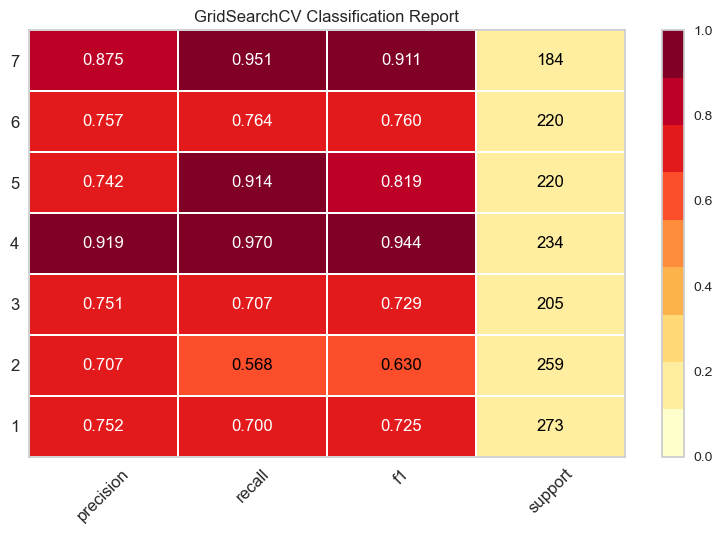

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [136]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(grid_xgb_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

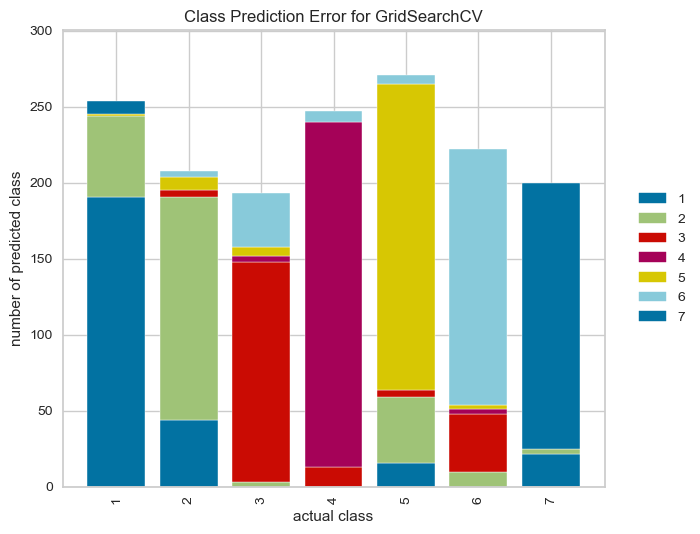

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [134]:
visualizer = ClassPredictionError(grid_xgb_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

In [ ]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "F1 Score": [svm_f1_test, rfc_f1_test, xgb_f1_test, modelTree_f1_test]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14)

# Accuracy Comparison

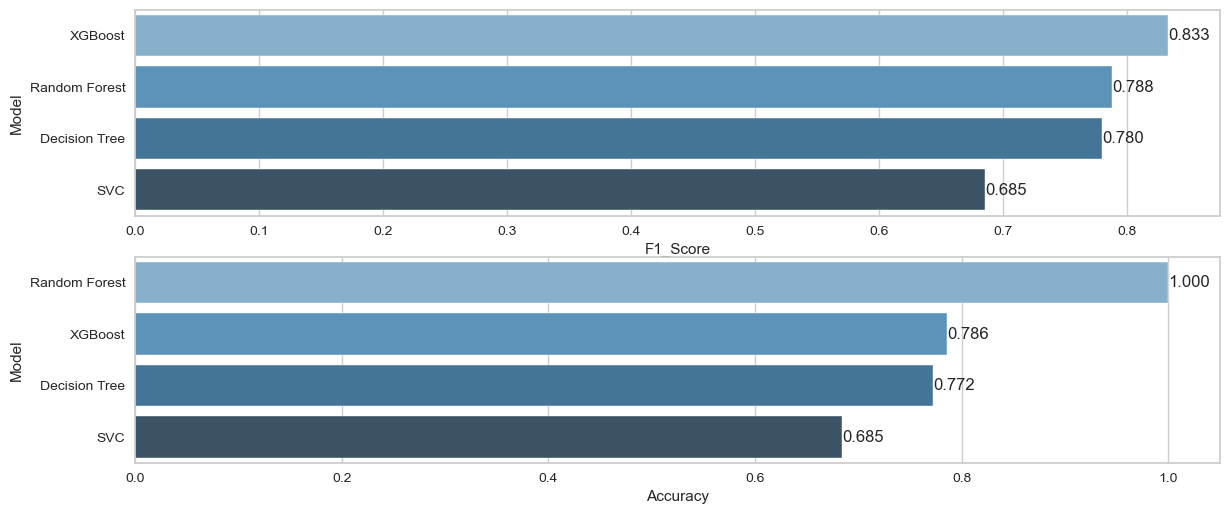

In [140]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [SVM_accuracy_test, rfc_accuracy_test, xgb_accuracy_test, modelTree_accuracy_test],
                       "F1_Score": [svm_f1_test, xgb_f1_test, rfc_f1_test,modelTree_f1_test]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,6))
plt.subplot(211)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)



plt.subplot(212)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___